In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [10]:
data = np.genfromtxt('feature_walking.txt', delimiter =',')
data.shape 

(240, 21)

In [15]:
# slice data 
x_data = data[:,:-1]
y_data = data[:, -1]

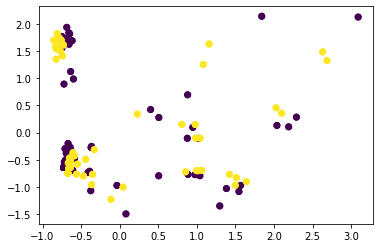

In [16]:
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

In [18]:
# building model  rbf is kernel func ,class_weight="balanced" 对样本数据进行平衡化,  
model = SVC(kernel = "rbf", class_weight="balanced")
model.fit(x_train, y_train)

SVC(class_weight='balanced')

              precision    recall  f1-score   support

        -1.0       0.46      0.52      0.49        33
         0.0       0.30      0.26      0.28        27

    accuracy                           0.40        60
   macro avg       0.38      0.39      0.38        60
weighted avg       0.39      0.40      0.39        60



In [55]:
# PCA 降维 
n_components = 10 # 降低到4个维度
pca = PCA(n_components = n_components, whiten=True).fit(x_data)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [62]:
# optimazation adjust parameters
param_grid = {"C":[2.8,3,3.2,3.5,4,5], "gamma":[0.004, 0.005, 0.007,1,1.5,2,3]}
model = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
model.fit(x_train_pca, y_train)
print(model.best_estimator_)# 参数组合的最优结果

SVC(C=2.8, class_weight='balanced', gamma=1)


In [57]:
x_train_pca.shape
x_test_pca.shape

(60, 10)

In [63]:
predictions = model.predict(x_test_pca)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        -1.0       0.96      0.70      0.81        33
         0.0       0.72      0.96      0.83        27

    accuracy                           0.82        60
   macro avg       0.84      0.83      0.82        60
weighted avg       0.85      0.82      0.82        60

